In [225]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

# This is an exploration of the Palmer Station penguins dataset 
# https://allisonhorst.github.io/palmerpenguins/
# Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer Archipelago (Antarctica) penguin data. R package version 0.1.0. https://allisonhorst.github.io/palmerpenguins/. doi: 10.5281/zenodo.3960218.
# https://en.wikipedia.org/wiki/Pygoscelis

# Three hundred brush-tailed penguins were briefly captured
# and subjected to humiliating beak, flipper, and weight measurements 
# so that data science students don't have to look at Ronald Fisher's 
# iris dataset.

In [ ]:
# There is a mirror of this dataset in vega-datasets.
# see if I'm allowed to download it by curl...
# curl https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json
!curl -OL https://raw.githubusercontent.com/vega/vega-datasets/next/data/penguins.json 

In [226]:
# Check that the download was data and not a webpage with an error...
!head penguins.json

[
  {
    "Species": "Adelie",
    "Island": "Torgersen",
    "Beak Length (mm)": 39.1,
    "Beak Depth (mm)": 18.7,
    "Flipper Length (mm)": 181,
    "Body Mass (g)": 3750,
    "Sex": "MALE"
  },


In [227]:
penguins = pd.read_json("../data/penguins.json")

In [231]:
g = penguins.iloc[np.random.permutation(len(penguins))]
len(penguins) * .25


64.25

In [230]:
penguins_train = g[87:]
penguins_test  = g[:87]
penguins_train.to_csv( "penguins_train.csv")
penguins_test.to_csv( "penguins_test.csv")
penguins = penguins_train
# There is a mistake in this cell that makes it not do what it 
# was intended.  

In [232]:
# How many penguins?
penguins.Species.value_counts(), len(penguins)

(Adelie       117
 Gentoo        92
 Chinstrap     48
 Name: Species, dtype: int64,
 257)

In [233]:
# Dictionary for painting the dots high-contrast colors
colors = { "Adelie" : "green", "Gentoo": "blue", "Chinstrap": "red"}

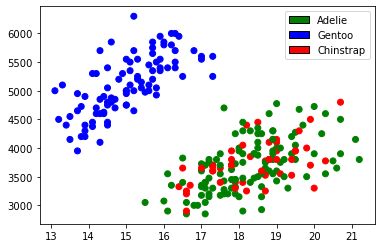

In [234]:
plt.scatter(penguins["Beak Depth (mm)"], penguins["Body Mass (g)"] , color = penguins.Species.map(colors)  )
# Had to look up how to make a legend for this kind of data
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=c[1], edgecolor='k', label=c[0]) for c in colors.items()]
plt.legend(handles=legend_elements)

<AxesSubplot:xlabel='Beak Depth (mm)', ylabel='Body Mass (g)'>

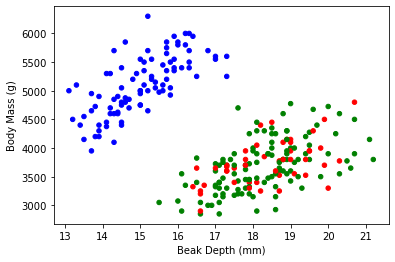

In [235]:
penguins.plot( "Beak Depth (mm)", "Body Mass (g)" , kind="scatter", color = penguins.Species.map(colors)  )

In [279]:
penguins["SP1"] = penguins.Species == "Adelie"
penguins["SP2"] = penguins.Species == "Gentoo"
penguins["SP3"] = penguins.Species == "Chinstrap"
penguins_test["SP1"]= penguins.Species == "Adelie"
penguins_test["SP2"]= penguins.Species == "Gentoo"
penguins_test["SP3"]= penguins.Species == "Chinstrap"


In [237]:
penguins["SP1"].sum(), penguins["SP2"].sum(), penguins["SP3"].sum()

(117, 92, 48)

In [238]:
len(penguins)

257

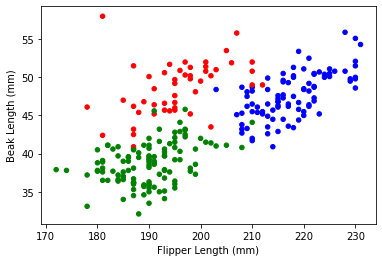

In [239]:
penguins[["Flipper Length (mm)", "Beak Length (mm)"]].plot("Flipper Length (mm)", "Beak Length (mm)", kind="scatter", color = penguins.Species.map(colors))
plt.savefig("PENGUIN.png", dpi=300, bbox_inches="tight")

In [240]:
penguins[["Beak Depth (mm)", "Body Mass (g)"]].values.shape, penguins.SP2.values[:, np.newaxis].shape

((257, 2), (257, 1))

In [241]:
# How do I get this in the right shape?
penguins.SP2.values[:, np.newaxis].shape

(257, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [242]:
reg = LinearRegression().fit(penguins[["Beak Depth (mm)", "Body Mass (g)"]].values, penguins.SP2.values)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Ok, ok, I'll clean up my dataframe.. sorry, scipy..

In [243]:
penguinclean = penguins[np.isfinite( penguins["Beak Depth (mm)"]) & 
                        np.isfinite( penguins["Body Mass (g)"]) &
                        np.isfinite( penguins["Flipper Length (mm)"]) & 
                        np.isfinite( penguins["Beak Length (mm)"])]

In [244]:
penguinclean.isnull().any()

Species                False
Island                 False
Beak Length (mm)       False
Beak Depth (mm)        False
Flipper Length (mm)    False
Body Mass (g)          False
Sex                     True
SP1                    False
SP2                    False
SP3                    False
dtype: bool

In [246]:
penguins_train = penguins_train[np.isfinite( penguins_train["Beak Depth (mm)"]) & 
                        np.isfinite( penguins_train["Body Mass (g)"]) &
                        np.isfinite( penguins_train["Flipper Length (mm)"]) & 
                        np.isfinite( penguins_train["Beak Length (mm)"])]

In [247]:
penguins_test = penguins_test[np.isfinite( penguins_test["Beak Depth (mm)"]) & 
                              np.isfinite( penguins_test["Body Mass (g)"]) &
                              np.isfinite( penguins_test["Flipper Length (mm)"]) & 
                              np.isfinite( penguins_test["Beak Length (mm)"])]

In [248]:
penguins_train.isnull().any(), len(penguins_test)

(Species                False
 Island                 False
 Beak Length (mm)       False
 Beak Depth (mm)        False
 Flipper Length (mm)    False
 Body Mass (g)          False
 Sex                     True
 SP1                    False
 SP2                    False
 SP3                    False
 dtype: bool,
 87)

In [249]:
penguins_test.isnull().any(), len(penguins_test)

(Species                False
 Island                 False
 Beak Length (mm)       False
 Beak Depth (mm)        False
 Flipper Length (mm)    False
 Body Mass (g)          False
 Sex                     True
 dtype: bool,
 87)

In [250]:
# run linear regression... this with just two columns for X
reg = LinearRegression().fit(penguinclean[["Beak Depth (mm)", "Body Mass (g)"]].values, penguinclean.SP2.values)

In [252]:
dir(reg)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [253]:
reg.coef_, reg.intercept_

(array([-0.13922917,  0.00032759]), 1.3635545069671697)

In [254]:
# Let us see if I can build the linear classifier out of the 
# coefficients in reg... 
X = penguinclean[["Beak Depth (mm)", "Body Mass (g)"]].values
Y = penguinclean.SP2
YHAT = np.dot(X, reg.coef_ ) + reg.intercept_

In [255]:
X.shape

(255, 2)

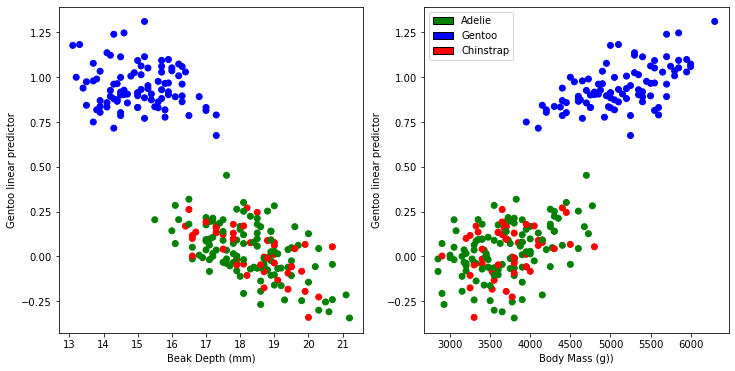

In [256]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X[:,0], YHAT, color=penguinclean.Species.map(colors) )
plt.xlabel("Beak Depth (mm)")
plt.ylabel("Gentoo linear predictor")

plt.subplot(122)
plt.scatter(X[:,1], YHAT, color=penguinclean.Species.map(colors) )
plt.xlabel("Body Mass (g))")
plt.ylabel("Gentoo linear predictor")
plt.legend(handles=legend_elements)


In [257]:
# My linear-leastsquares-fit coefficients were 
#  (array([-0.13720996,  0.00033089]), 1.3226593522496826)
# That's b0, b1, and C...
# yhat = b0 * X[:,0] + b1* X[:,1] + C 
# high school algebra... the boundary is x1div = (0.5 - c) / b1 - b0 /b1 * x0

x0div = np.arange(14,24)
x1div = (0.5 - reg.intercept_)/ reg.coef_[1] - reg.coef_[0] / reg.coef_[1] * x0div

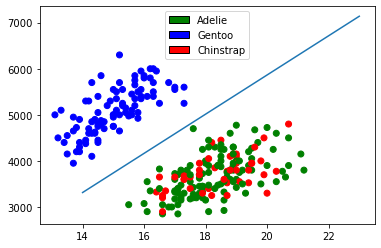

In [258]:
plt.scatter(X[:,0], X[:,1], color=penguinclean.Species.map(colors) )
plt.legend(handles=legend_elements)

plt.plot(x0div, x1div)

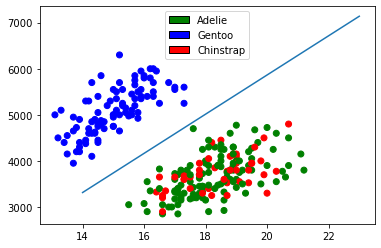

In [259]:
plt.scatter(penguins["Beak Depth (mm)"], penguins["Body Mass (g)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
plt.plot(x0div, x1div)

In [ ]:
# "Shooting fish in a barrel."

# We took two features, performed linear regression, and 
# used the coefficients to build a linear classifier.

# Gentoo is easy to tell apart from the other two species of brush-tailed penguin.


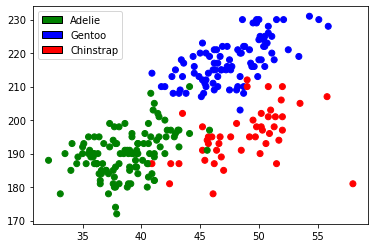

In [260]:
# Other dimensions will be informative about the difference between
# the red and the green birds:
plt.scatter(penguins["Beak Length (mm)"], penguins["Flipper Length (mm)"] , color = penguins.Species.map(colors)  )
plt.legend(handles=legend_elements)
# I can glance at this graph and guess at the locations of the
# lines that would separate each of the three species from the
# rest, but I will need a little ore theory to do three-way classificaiton. 

In [265]:
# Now I'm going to go after a harder problem; Adelie penguins with all four X
reg4_1 = LinearRegression().fit(penguins_train[["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"]].values, penguins_train.SP1.values)

In [267]:
reg4_1.coef_, reg4_1.intercept_

(array([ 0.09549233,  0.00013648, -0.07127298, -0.00515903]),
 2.400865376145987)

In [269]:
print(["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"])
reg4_1.coef_, reg4_1.intercept_

['Beak Depth (mm)', 'Body Mass (g)', 'Beak Length (mm)', 'Flipper Length (mm)']


(array([ 0.09549233,  0.00013648, -0.07127298, -0.00515903]),
 2.400865376145987)

In [ ]:
# Can I interpret these coefficients?  I can interpret their signs, of course..
# Three of the measurements are in mm, one is in g, and they have different
# relevant scales.


In [268]:
penguins_train.std()

Beak Length (mm)         5.501570
Beak Depth (mm)          1.903730
Flipper Length (mm)     14.405061
Body Mass (g)          816.421390
SP1                      0.498941
SP2                      0.480016
SP3                      0.391669
dtype: float64

In [270]:
# Let's set put the standard deviations of each column of X into an array:
feature_std = np.array([1.964146, 826.402823,  5.046194,  13.464290 ])
# If I arranged the columns correctly, this product 
print(["Beak Depth (mm)", "Body Mass (g)", "Beak Length (mm)", "Flipper Length (mm)"])

reg4_1.coef_ * feature_std


['Beak Depth (mm)', 'Body Mass (g)', 'Beak Length (mm)', 'Flipper Length (mm)']


array([ 0.18756087,  0.11279097, -0.3596573 , -0.06946265])

In [ ]:
# tells us a little more about which fields had more weight.  
# Flipper length and Body mass aren't as weighted as two 
# beak measurements.

In [271]:
SP1PREDICT_train= np.dot( penguins_train[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values,reg2.coef_) + reg2.intercept_

In [272]:
penguins_train["SP1PREDICT"] = SP1PREDICT_train > 0.5
penguins_train["SP1LINEAR"] = SP1PREDICT_train 

In [273]:
SP1PREDICT_test= np.dot( penguins_test[["Beak Depth (mm)", "Body Mass (g)", 'Beak Length (mm)', "Flipper Length (mm)"]].values,reg2.coef_) + reg2.intercept_

In [274]:
penguins_test["SP1PREDICT"] = SP1PREDICT_test > 0.5
penguins_test["SP1LINEAR"] = SP1PREDICT_test 

In [275]:
penguins_train.groupby(["SP1PREDICT", "SP1"]).SP1PREDICT.count()

SP1PREDICT  SP1  
False       False    137
            True       2
True        False      2
            True     114
Name: SP1PREDICT, dtype: int64

In [276]:
len(penguins_train)

255

In [ ]:
# On the training data, which is cheating,  
# Out of 256 penguins, the four-dimensional linear classifier got 252 right
# and 4 wrong on the "is-it-an-Adelie"

In [277]:
penguins_test.groupby(["SP1PREDICT", "SP1"]).SP1PREDICT.count()

KeyError: 'SP1'

In [ ]:
penguins_test.head()

In [ ]:
# Since the scores for a binary classifier are in one dimension, 
# I can histogram them

plt.hist(SP1PREDICT, bins=50)

In [ ]:
# And they are nicely bimodal.
